In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from collections import Counter

In [2]:
ineq_df = pd.read_csv("income_evaluation.csv")



In [3]:
ineq_df.head()



,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
print(ineq_df)

       age          workclass   fnlwgt    education   education-num  \
0       39          State-gov    77516    Bachelors              13   
1       50   Self-emp-not-inc    83311    Bachelors              13   
2       38            Private   215646      HS-grad               9   
3       53            Private   234721         11th               7   
4       28            Private   338409    Bachelors              13   
...    ...                ...      ...          ...             ...   
32556   27            Private   257302   Assoc-acdm              12   
32557   40            Private   154374      HS-grad               9   
32558   58            Private   151910      HS-grad               9   
32559   22            Private   201490      HS-grad               9   
32560   52       Self-emp-inc   287927      HS-grad               9   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   

In [5]:

ineq_df.isnull().any()


age                False
 workclass         False
 fnlwgt            False
 education         False
 education-num     False
 marital-status    False
 occupation        False
 relationship      False
 race              False
 sex               False
 capital-gain      False
 capital-loss      False
 hours-per-week    False
 native-country    False
 income            False
dtype: bool

In [6]:
ineq_df.dtypes


age                 int64
 workclass         object
 fnlwgt             int64
 education         object
 education-num      int64
 marital-status    object
 occupation        object
 relationship      object
 race              object
 sex               object
 capital-gain       int64
 capital-loss       int64
 hours-per-week     int64
 native-country    object
 income            object
dtype: object

In [7]:
#us_only = ineq_df[ineq_df["native-country"] = United-States]

#us_only.head()

In [8]:
"""orig_country = ineq_df[["age",]]

orig_country.head()#attempting the filter rows where native country is from United States."""

'orig_country = ineq_df[["age",]]\n\norig_country.head()#attempting the filter rows where native country is from United States.'

In [9]:
ineq_df= ineq_df[ineq_df[' native-country'].str.contains('United-States')]
print(ineq_df)

       age          workclass   fnlwgt    education   education-num  \
0       39          State-gov    77516    Bachelors              13   
1       50   Self-emp-not-inc    83311    Bachelors              13   
2       38            Private   215646      HS-grad               9   
3       53            Private   234721         11th               7   
5       37            Private   284582      Masters              14   
...    ...                ...      ...          ...             ...   
32556   27            Private   257302   Assoc-acdm              12   
32557   40            Private   154374      HS-grad               9   
32558   58            Private   151910      HS-grad               9   
32559   22            Private   201490      HS-grad               9   
32560   52       Self-emp-inc   287927      HS-grad               9   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   

In [10]:
ineq_df.shape






(29170, 15)

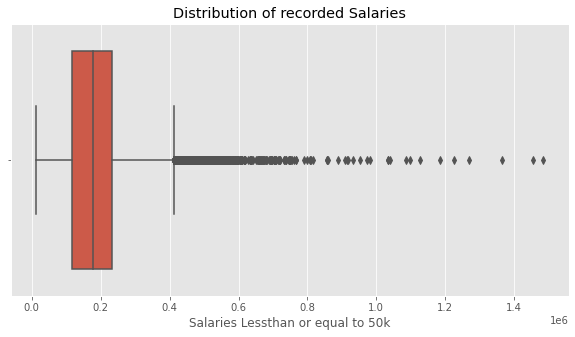

In [16]:


plt.figure(figsize = (10,5))
plt.style.use('ggplot')

ax = sns.boxplot(x= ' fnlwgt', data = ineq_df)
ax.set(title = 'Distribution of recorded Salaries', xlabel = 'Salaries Lessthan or equal to 50k')
plt.savefig('Salary_ineq.png', bbox_inches = "tight")

In [20]:
from sklearn import tree
from sklearn.model_selection import train_test_split



In [18]:
"""x = data.drop('ineq_df', axis = 1)
y = data['ineq_df']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

dectree = tree.DecisionTreeClassifier(max_depth=5)
%time dectree = dectree.fit(x_train,y_train)
y_pred = dectree.predict(x_test)"""


"x = data.drop('ineq_df', axis = 1)\ny = data['ineq_df']\nx_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)\n\ndectree = tree.DecisionTreeClassifier(max_depth=5)\n%time dectree = dectree.fit(x_train,y_train)\ny_pred = dectree.predict(x_test)"

In [19]:
"""dectree = tree.DecisionTreeClassifier(max_depth=5)
%time dectree = dectree.fit(x_train,y_train)
y_pred = dectree.predict(x_test)

feature_names = ['age','workclass', 'fnlwgt', 'education','education-num','marital-status','occupation','relationship','race','sex',
                 'capital-gain','capital-loss','hours-per-week','native-country','income']

plt.figure(figsize=(50,50))
tree.plot_tree(dectree, feature_names=feature_names, filled=True)"""

"dectree = tree.DecisionTreeClassifier(max_depth=5)\n%time dectree = dectree.fit(x_train,y_train)\ny_pred = dectree.predict(x_test)\n\nfeature_names = ['age','workclass', 'fnlwgt', 'education','education-num','marital-status','occupation','relationship','race','sex',\n                 'capital-gain','capital-loss','hours-per-week','native-country','income']\n\nplt.figure(figsize=(50,50))\ntree.plot_tree(dectree, feature_names=feature_names, filled=True)"

<AxesSubplot:ylabel='Density'>

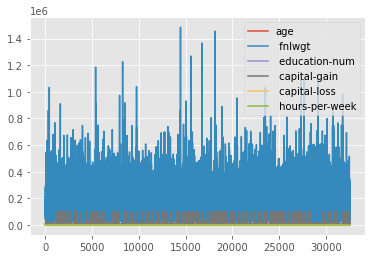

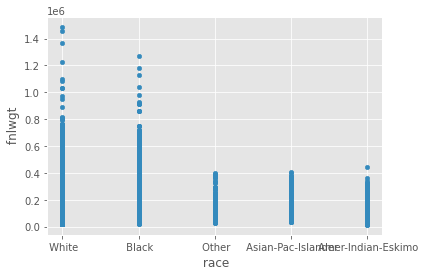

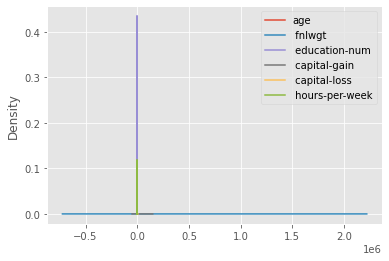

In [23]:
ineq_df.plot()
ineq_df.plot(kind='scatter', x=' race',y=' fnlwgt')
ineq_df.plot(kind='density')

<AxesSubplot:ylabel='Density'>

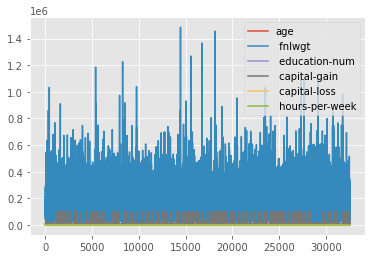

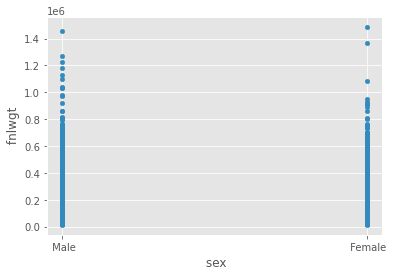

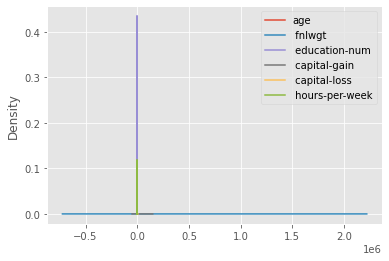

In [24]:
ineq_df.plot()
ineq_df.plot(kind='scatter', x=' sex',y=' fnlwgt')
ineq_df.plot(kind='density')

In [41]:
"""data = pd.read_csv("income_evaluation.csv")

X =  ineq_df
y =  ineq_df

X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size = 0.2, random_state = 100)

knn = KNeighborsClassifier(n_neighbors =7)

knn.fit(X_train, y_train)

print(knn.predict(X_test))"""

'data = pd.read_csv("income_evaluation.csv")\n\nX =  ineq_df\ny =  ineq_df\n\nX_train, X_test, y_train, y_test = train_test_split(\n            X, y, test_size = 0.2, random_state = 100)\n\nknn = KNeighborsClassifier(n_neighbors =7)\n\nknn.fit(X_train, y_train)\n\nprint(knn.predict(X_test))'

In [46]:
dataset = pd.read_csv("income_evaluation.csv")




In [47]:
dataset.dtypes


age                 int64
 workclass         object
 fnlwgt             int64
 education         object
 education-num      int64
 marital-status    object
 occupation        object
 relationship      object
 race              object
 sex               object
 capital-gain       int64
 capital-loss       int64
 hours-per-week     int64
 native-country    object
 income            object
dtype: object

In [157]:
dataset[' income']=dataset[' income'].map({'<=50K': 0, '>50k': 1, '<=50K.': 0, '>50K.': 1})

dataset.head(9)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,NaN
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,NaN
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,NaN
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,NaN
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,NaN
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,NaN
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,NaN
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,NaN
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,NaN


In [165]:
categorical_ft = [' workclass',' education',' marital-status',' occupation',' relationship',' race',' sex',' native-country']

numerical_ft = ['age',' fnlwgt',' education-num',' capital-gain',' capital-loss',' hours-per-week',' income']

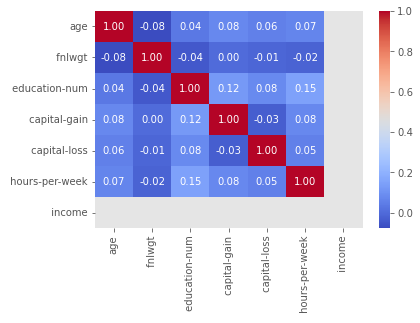

In [159]:
vis = sns.heatmap(dataset[numerical_ft].corr(),annot=True,fmt = ".2f", cmap = "coolwarm")
plt.show()

In [97]:
dataset[" workclass"] = dataset[" workclass"].fillna("X")
dataset[" occupation"] = dataset[" occupation"].fillna("X")
dataset[" native-country"] = dataset[" native-country"].fillna(" United-States")

In [98]:
dataset.isnull().sum()

age                    0
 workclass             0
 fnlwgt                0
 education             0
 education-num         0
 marital-status        0
 occupation            0
 relationship          0
 race                  0
 sex                   0
 capital-gain          0
 capital-loss          0
 hours-per-week        0
 native-country        0
 income            32561
dtype: int64

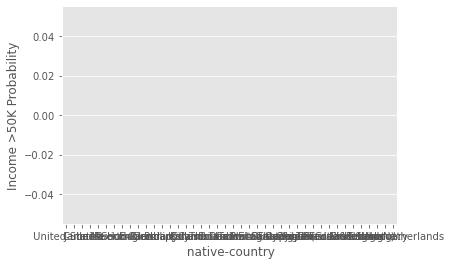

In [107]:
vis = sns.barplot(x=" native-country",y=" income",data=dataset)
vis = vis.set_ylabel("Income >50K Probability")
plt.show()

In [4]:
ineq_df = ineq_df.drop('Private',1)

In [139]:
array = dataset.values
X = array[:,0:8]
Y = array[:,8]
print('Split Data: X')
print(X)
print('Split Data: Y')
print(Y)
validation_size = 0.20
seed = 7
num_folds = 10
scoring = 'accuracy'
X_train, X_validation, Y_train, Y_validation = train_test_split(X,Y,
    test_size=validation_size, random_state=seed)

Split Data: X
[[39 ' State-gov' 77516 ... ' Never-married' ' Adm-clerical'
  ' Not-in-family']
 [50 ' Self-emp-not-inc' 83311 ... ' Married-civ-spouse'
  ' Exec-managerial' ' Husband']
 [38 ' Private' 215646 ... ' Divorced' ' Handlers-cleaners'
  ' Not-in-family']
 ...
 [58 ' Private' 151910 ... ' Widowed' ' Adm-clerical' ' Unmarried']
 [22 ' Private' 201490 ... ' Never-married' ' Adm-clerical' ' Own-child']
 [52 ' Self-emp-inc' 287927 ... ' Married-civ-spouse' ' Exec-managerial'
  ' Wife']]
Split Data: Y
[' White' ' White' ' White' ... ' White' ' White' ' White']


In [140]:
num_trees = 100
max_features = 3

In [141]:
models.append(('KNN', KNeighborsClassifier()))

In [1]:
random_forest = RandomForestClassifier(n_estimators=250,max_features=5)
random_forest.fit(X_train, Y_train)
predictions = random_forest.predict(X_validation)
print("Accuracy: %s%%" % (100*accuracy_score(Y_validation, predictions)))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

'random_forest = RandomForestClassifier(n_estimators=250,max_features=5)\nrandom_forest.fit(X_train, Y_train)\npredictions = random_forest.predict(X_validation)\nprint("Accuracy: %s%%" % (100*accuracy_score(Y_validation, predictions)))\nprint(confusion_matrix(Y_validation, predictions))\nprint(classification_report(Y_validation, predictions))'

In [2]:


dec = DecisionTreeClassifier(criterion= " income", max_depth=5)

dec = dec.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

'dec = DecisionTreeClassifier(criterion= " income", max_depth=5)\n\ndec = dec.fit(X_train,y_train)\n\ny_pred = clf.predict(X_test)\n\nprint("Accuracy:", metrics.accuracy_score(y_test, y_pred))'

In [3]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


svm_pipe = Pipeline([('scaler', StandardScaler()),('svm', SVC())])

svm_pipe.fit(X_train, y_train)
svm_pipe.score(X_test, y_test)

"from sklearn.pipeline import Pipeline\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.svm import SVC\n\n\nsvm_pipe = Pipeline([('scaler', StandardScaler()),('svm', SVC())])\n\nsvm_pipe.fit(X_train, y_train)\nsvm_pipe.score(X_test, y_test)"